# Importing libraries and loading data

*I’m using Google Colab when making this notebook. I use web scraper, a google chrome extension to get data from PHIVOLCS Latest Earthquake Information (link: https://earthquake.phivolcs.dost.gov.ph/). The available data is from 2018 up to the present.*

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#loading the data
df_raw = pd.read_csv("/content/Raw_earthquake.csv")
df_raw

,web-scraper-order,web-scraper-start-url,Pagination,Pagination-href,Date - Time (Philippine Time),Latitude,Longitude,Depth_km,Mag,Location
0,1677352702-172448,https://earthquake.phivolcs.dost.gov.ph/,Dec,https://earthquake.phivolcs.dost.gov.ph/EQLate...,31 December 2018 - 10:47 PM,8.62,126.01,10,2.0,011 km N 61° E of Prosperidad (Agusan Del Sur)
1,1677352702-172449,https://earthquake.phivolcs.dost.gov.ph/,Dec,https://earthquake.phivolcs.dost.gov.ph/EQLate...,31 December 2018 - 10:16 PM,12.92,122.8,14,2.5,040 km N 80° W of Claveria (Masbate)
2,1677352702-172450,https://earthquake.phivolcs.dost.gov.ph/,Dec,https://earthquake.phivolcs.dost.gov.ph/EQLate...,31 December 2018 - 10:14 PM,5.61,126.92,32,3.7,148 km S 39° E of Governor Generoso (Davao Ori...
3,1677352702-172451,https://earthquake.phivolcs.dost.gov.ph/,Dec,https://earthquake.phivolcs.dost.gov.ph/EQLate...,31 December 2018 - 07:43 PM,5.52,126.96,31,2.7,159 km S 38° E of Governor Generoso (Davao Ori...
4,1677352702-172452,https://earthquake.phivolcs.dost.gov.ph/,Dec,https://earthquake.phivolcs.dost.gov.ph/EQLate...,31 December 2018 - 06:46 PM,5.48,126.35,1,3.2,093 km S 61° E of Jose Abad Santos (Davao Occi...
...,...,...,...,...,...,...,...,...,...,...
59790,1677352702-232238,https://earthquake.phivolcs.dost.gov.ph/,Jan,https://earthquake.phivolcs.dost.gov.ph/EQLate...,01 January 2022 - 02:39 AM,14.01,120.44,121,2.6,021 km S 72° W of Nasugbu (Batangas)
59791,1677352702-232239,https://earthquake.phivolcs.dost.gov.ph/,Jan,https://earthquake.phivolcs.dost.gov.ph/EQLate...,01 January 2022 - 02:27 AM,10.6,125.81,12,2.3,019 km S 32° E of Homonhon Island (Guiuan) (Ea...
59792,1677352702-232240,https://earthquake.phivolcs.dost.gov.ph/,Jan,https://earthquake.phivolcs.dost.gov.ph/EQLate...,01 January 2022 - 02:17 AM,7.04,126.66,26,4.2,023 km S 35° E of Manay (Davao Oriental)
59793,1677352702-232241,https://earthquake.phivolcs.dost.gov.ph/,Jan,https://earthquake.phivolcs.dost.gov.ph/EQLate...,01 January 2022 - 01:24 AM,13.44,120.16,28,2.1,033 km N 85° W of Paluan (Occidental Mindoro)


# PreProcessing

In [ ]:
#Checking null data
nan_count01 = df_raw.isna().sum()
print(nan_count01)

web-scraper-order                0
web-scraper-start-url            0
Pagination                       0
Pagination-href                  0
Date - Time (Philippine Time)    0
Latitude                         0
Longitude                        0
Depth_km                         1
Mag                              1
Location                         0
dtype: int64


In [ ]:
#Creating dataframe with needed data
df_new = df_raw[['Date - Time (Philippine Time)','Latitude','Longitude','Depth_km', 'Mag', 'Location']]
df_new

,Date - Time (Philippine Time),Latitude,Longitude,Depth_km,Mag,Location
0,31 December 2018 - 10:47 PM,8.62,126.01,10,2.0,011 km N 61° E of Prosperidad (Agusan Del Sur)
1,31 December 2018 - 10:16 PM,12.92,122.8,14,2.5,040 km N 80° W of Claveria (Masbate)
2,31 December 2018 - 10:14 PM,5.61,126.92,32,3.7,148 km S 39° E of Governor Generoso (Davao Ori...
3,31 December 2018 - 07:43 PM,5.52,126.96,31,2.7,159 km S 38° E of Governor Generoso (Davao Ori...
4,31 December 2018 - 06:46 PM,5.48,126.35,1,3.2,093 km S 61° E of Jose Abad Santos (Davao Occi...
...,...,...,...,...,...,...
59790,01 January 2022 - 02:39 AM,14.01,120.44,121,2.6,021 km S 72° W of Nasugbu (Batangas)
59791,01 January 2022 - 02:27 AM,10.6,125.81,12,2.3,019 km S 32° E of Homonhon Island (Guiuan) (Ea...
59792,01 January 2022 - 02:17 AM,7.04,126.66,26,4.2,023 km S 35° E of Manay (Davao Oriental)
59793,01 January 2022 - 01:24 AM,13.44,120.16,28,2.1,033 km N 85° W of Paluan (Occidental Mindoro)


In [ ]:
#Removing duplicates and null
df_new1 = df_new.drop_duplicates()
df_new2 = df_new1.dropna()
df_new2.shape

(59759, 6)

In [ ]:
#Checking type of data
df_new2.dtypes

Date - Time (Philippine Time)     object
Latitude                          object
Longitude                         object
Depth_km                          object
Mag                              float64
Location                          object
dtype: object

*There are possible special characters (like "-") that makes the Latitude, Longitude and Depth into objects instead of float or integers.*

In [ ]:
#Checking of characters in Latitude, Longitude and Depth columns
df_new2['Latitude'].str.contains('-').any()

True

In [ ]:
df_new2['Longitude'].str.contains('-').any()

True

In [ ]:
df_new2['Depth_km'].str.contains('-').any()

True

In [ ]:
#Removing rows containing "-" in Latitude, Longitude and Depth
df_new01 = df_new2.loc[df_new["Latitude"] != "-"]
df_new01.shape

(59737, 6)

In [ ]:
df_new02 = df_new01.loc[df_new01["Longitude"] != "-"]
df_new02.shape

(59737, 6)

In [ ]:
df_new03 = df_new01.loc[df_new01["Depth_km"] != "-"]
df_new03.shape

(59736, 6)

In [ ]:
#Checking data types after removing rows containing "-"
df_new03.dtypes

Date - Time (Philippine Time)     object
Latitude                          object
Longitude                         object
Depth_km                          object
Mag                              float64
Location                          object
dtype: object

In [ ]:
#Changing data type
df_new04 = df_new03.astype({"Latitude": 'float64', "Longitude": 'float64', "Depth_km": 'int'})
df_new04.dtypes

Date - Time (Philippine Time)     object
Latitude                         float64
Longitude                        float64
Depth_km                           int64
Mag                              float64
Location                          object
dtype: object

*I based the latitude and longitude limit on the latest Philippine Seismic Network map (link: https://drive.google.com/file/d/1UCD4TAGHV_Nby9SBqCRQBSE4J_SHFjl4/view?ts=624eb0fc).*

In [ ]:
df_new05 = df_new04.loc[(df_new04["Longitude"] > 116) & (df_new04["Longitude"] < 130)]
df_new05.shape

(59730, 6)

In [ ]:
df_new06 = df_new05.loc[(df_new05["Latitude"] < 22) & (df_new05["Latitude"] > 2)]
df_new06.shape

(59722, 6)

In [ ]:
#Extract date and time
df_format = df_new06.copy(deep=True)
df_format.rename(columns = {'Date - Time (Philippine Time)':'Date_time'}, inplace = True)
df_format['Date_time']=pd.to_datetime(df_format['Date_time'],errors='coerce')
df_format['Time']=df_format['Date_time'].dt.time
df_format['Date']= df_format['Date_time'].dt.date
df_format['Year']= df_format['Date_time'].dt.strftime('%Y')
df_format['Month']= df_format['Date_time'].dt.strftime('%m')
df_format['Year_month'] = df_format['Date_time'].dt.strftime('%Y-%m')
new_cols = ["Date_time","Year","Year_month","Month","Date","Time","Latitude","Longitude","Depth_km","Mag","Location"]
df_formatnew=df_format[new_cols]
df_formatnew.sort_values(by=['Date_time'])
df_formatnew.head()

,Date_time,Year,Year_month,Month,Date,Time,Latitude,Longitude,Depth_km,Mag,Location
0,2018-12-31 22:47:00,2018,2018-12,12,2018-12-31,22:47:00,8.62,126.01,10,2.0,011 km N 61° E of Prosperidad (Agusan Del Sur)
1,2018-12-31 22:16:00,2018,2018-12,12,2018-12-31,22:16:00,12.92,122.80,14,2.5,040 km N 80° W of Claveria (Masbate)
2,2018-12-31 22:14:00,2018,2018-12,12,2018-12-31,22:14:00,5.61,126.92,32,3.7,148 km S 39° E of Governor Generoso (Davao Ori...
3,2018-12-31 19:43:00,2018,2018-12,12,2018-12-31,19:43:00,5.52,126.96,31,2.7,159 km S 38° E of Governor Generoso (Davao Ori...
4,2018-12-31 18:46:00,2018,2018-12,12,2018-12-31,18:46:00,5.48,126.35,1,3.2,093 km S 61° E of Jose Abad Santos (Davao Occi...


In [ ]:
df_formatnew.tail()

,Date_time,Year,Year_month,Month,Date,Time,Latitude,Longitude,Depth_km,Mag,Location
59790,2022-01-01 02:39:00,2022,2022-01,01,2022-01-01,02:39:00,14.01,120.44,121,2.6,021 km S 72° W of Nasugbu (Batangas)
59791,2022-01-01 02:27:00,2022,2022-01,01,2022-01-01,02:27:00,10.60,125.81,12,2.3,019 km S 32° E of Homonhon Island (Guiuan) (Ea...
59792,2022-01-01 02:17:00,2022,2022-01,01,2022-01-01,02:17:00,7.04,126.66,26,4.2,023 km S 35° E of Manay (Davao Oriental)
59793,2022-01-01 01:24:00,2022,2022-01,01,2022-01-01,01:24:00,13.44,120.16,28,2.1,033 km N 85° W of Paluan (Occidental Mindoro)
59794,2022-01-01 00:06:00,2022,2022-01,01,2022-01-01,00:06:00,5.76,124.56,3,2.6,026 km S 15° W of Kiamba (Sarangani)


# Descriptive Analytics

In [ ]:
df_formatnew.describe()

,Latitude,Longitude,Depth_km,Mag
count,59722.000000,59722.000000,59722.000000,59722.000000
mean,11.003224,123.797796,31.312197,2.579179
std,4.172947,2.523625,39.717583,0.672690
min,2.020000,116.300000,0.000000,1.000000
25%,7.170000,120.960000,9.000000,2.100000
50%,10.070000,124.750000,21.000000,2.500000
75%,14.000000,126.120000,33.000000,2.900000
max,21.980000,129.120000,1068.000000,7.200000


*Latitude ranges from around 4 up to around 22 and longitude ranges from around 116 up to around 129. The deepest focal depth recorded is 1068km while the shallowest is 0km (surface). The highest magnitude recorded is 7.2 and the lowest is 1.0.*

# Diagnostic Analytics

<AxesSubplot:>

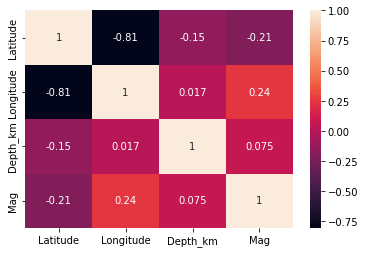

In [ ]:
#Correlation Heatmap
sns.heatmap(df_formatnew.corr(), annot=True)

*Latitude and longitude have a high correlation since these parameters are related to the position. However, magnitude and focal depth have a negligible correlation (correlation less than 0.30) to latitude and longitude.*

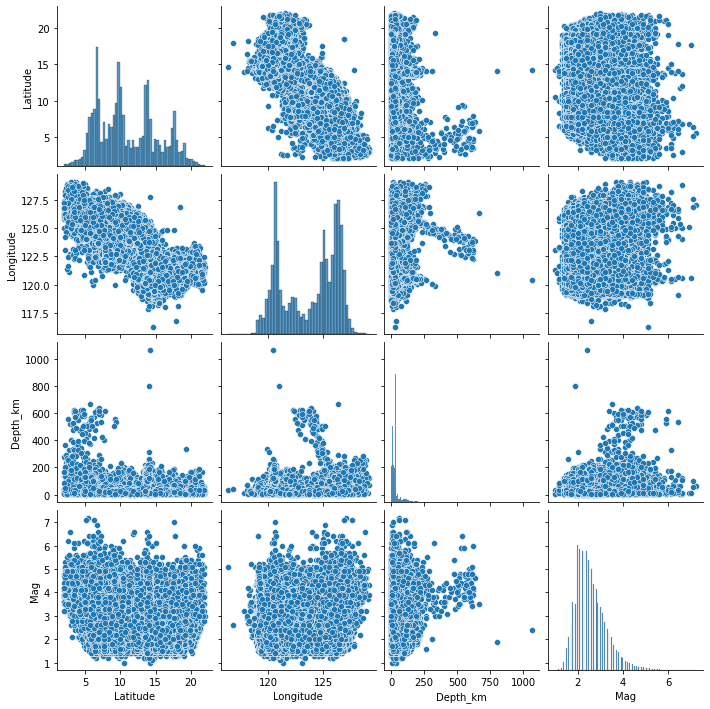

In [ ]:
sns.pairplot(df_formatnew)

*Earthquakes that have a magnitude greater than or equal to 6 are usually located below latitude 10 and near longitude 125. The majority of earthquakes have a focal depth of less than 250km. Most of the recorded earthquakes have a magnitude of 2.0~3.0.*

# Earthquake Classification

*Earthquake can be classified based on Magnitude and focal depth*

**Based on Magnitude**
*   Micro: < 3.0
*   Minor: 3.0 - 3.9
*   Light: 4.0 - 4.9
*   Moderate: 5.0 - 5.9
*   Strong: 6.0 - 6.9
*   Major: 7.0 - 7.9
*   Great: ≥ 8.0


**Based on focal depth**
*   Shallow earthquake: 0–70 km
*   Intermediate earthquake: 71–300 km
*   Deep earthquake: > 300 km



In [ ]:
df_eq = df_formatnew.copy(deep=True)

In [ ]:
#Creating category based on Magnitude
def mag_cat (x):
  if x >= 8:
    return "Great"
  elif x >= 7:
    return "Major"
  elif x >= 6:
    return "Strong"
  elif x >= 5:
    return "Moderate"
  elif x >= 4:
    return "Light"
  elif x >= 3:
    return "Minor"
  else: return "Micro"

In [ ]:
df_eq["Cat_mag"] = df_eq["Mag"].apply(mag_cat)
df_eq.head()

,Date_time,Year,Year_month,Month,Date,Time,Latitude,Longitude,Depth_km,Mag,Location,Cat_mag
0,2018-12-31 22:47:00,2018,2018-12,12,2018-12-31,22:47:00,8.62,126.01,10,2.0,011 km N 61° E of Prosperidad (Agusan Del Sur),Micro
1,2018-12-31 22:16:00,2018,2018-12,12,2018-12-31,22:16:00,12.92,122.80,14,2.5,040 km N 80° W of Claveria (Masbate),Micro
2,2018-12-31 22:14:00,2018,2018-12,12,2018-12-31,22:14:00,5.61,126.92,32,3.7,148 km S 39° E of Governor Generoso (Davao Ori...,Minor
3,2018-12-31 19:43:00,2018,2018-12,12,2018-12-31,19:43:00,5.52,126.96,31,2.7,159 km S 38° E of Governor Generoso (Davao Ori...,Micro
4,2018-12-31 18:46:00,2018,2018-12,12,2018-12-31,18:46:00,5.48,126.35,1,3.2,093 km S 61° E of Jose Abad Santos (Davao Occi...,Minor


In [ ]:
#Creating category based on focal depth
def depth_cat (x):
  if x > 300:
    return "Deep"
  if x > 70:
    return "Intermediate"
  else: return "Shallow"

In [ ]:
df_eq["Cat_depth"] = df_eq["Depth_km"].apply(depth_cat)
df_eq.head()

,Date_time,Year,Year_month,Month,Date,Time,Latitude,Longitude,Depth_km,Mag,Location,Cat_mag,Cat_depth
0,2018-12-31 22:47:00,2018,2018-12,12,2018-12-31,22:47:00,8.62,126.01,10,2.0,011 km N 61° E of Prosperidad (Agusan Del Sur),Micro,Shallow
1,2018-12-31 22:16:00,2018,2018-12,12,2018-12-31,22:16:00,12.92,122.80,14,2.5,040 km N 80° W of Claveria (Masbate),Micro,Shallow
2,2018-12-31 22:14:00,2018,2018-12,12,2018-12-31,22:14:00,5.61,126.92,32,3.7,148 km S 39° E of Governor Generoso (Davao Ori...,Minor,Shallow
3,2018-12-31 19:43:00,2018,2018-12,12,2018-12-31,19:43:00,5.52,126.96,31,2.7,159 km S 38° E of Governor Generoso (Davao Ori...,Micro,Shallow
4,2018-12-31 18:46:00,2018,2018-12,12,2018-12-31,18:46:00,5.48,126.35,1,3.2,093 km S 61° E of Jose Abad Santos (Davao Occi...,Minor,Shallow


# Visualization

In [ ]:
#Line graph for yearly earthquake occurence
df_year_mag = df_eq.groupby(['Year','Mag'],as_index=False).agg(Frequency=('Mag','count'))
df_year_mag.sort_values(by=['Year'])

fig_line01 = px.line(data_frame=df_year_mag, x="Mag", y="Frequency", color ="Year", title="Yearly Earthquake Occurrence by Magnitude")
fig_line01.update_layout(xaxis_title = 'Magnitude')
fig_line01.show()

*The Philippines almost experience the same number of earthquakes yearly except in the year 2018. The oldest available record in PHIVOLCS is only up to 2018. The majority of earthquakes recorded are around magnitude 2~2.5, categorized as minor earthquakes.*

In [ ]:
#Line graph for monthly earthquake occurence
df_year_mon = df_eq.groupby(['Year','Month'],as_index=False).agg(Frequency=('Mag','count'))
df_year_mon.sort_values(by=['Year'])

fig_line02 = px.line(data_frame=df_year_mon, x="Month", y="Frequency", color ="Year", title="Monthly Earthquake Occurrence")
fig_line02.show()

*No common month with a high or low occurrence of an earthquake*

In [ ]:
#Bar graph for earthquake based on focal depth
df_yearmonth_depth = df_eq.groupby(['Year_month', 'Cat_depth'],as_index=False).agg(count=('Mag','count'))
df_yearmonth_depth.sort_values(by=['Year_month'])

fig_bar01 = px.bar(data_frame=df_yearmonth_depth, x="Year_month", y="count", color="Cat_depth", title="Earthquake based on Focal Depth")
fig_bar01.update_layout(xaxis_title ='Year & Month',legend_title_text='Category by focal depth')
fig_bar01.show()

*The majority of earthquakes detected are shallow (less than 70km). The strength of shaking felt on the earth’s surface from an earthquake diminishes with increasing distance from the earthquake's source. For the same magnitude, the strength of a shallow earthquake is greater than an intermediate or a deep earthquake.*

In [ ]:
#Line graph for yearly earthquake occurence
df_dep_below250 = df_eq.loc[(df_eq["Depth_km"] <=250)]
df_year_dep = df_dep_below250.groupby(['Year','Depth_km'],as_index=False).agg(Frequency=('Mag','count'))
df_year_dep.sort_values(by=['Year'])

fig_line03 = px.line(data_frame=df_year_dep, x="Depth_km", y="Frequency", color ="Year", title="Yearly Earthquake Occurrence by Focal Depth")
fig_line03.update_layout(xaxis_title = 'Focal depth (km)')
fig_line03.show()

*Most of the recorded focal depth is less than 5km. However, there is a sudden spike around 30km depth. The continental crust is about 32km on average. Between the Earth’s crust and mantle is the Moho or Mohorovičić discontinuity. It lies at a depth of around 35km. These earthquakes recorded around 30km depth must be originated at the Moho.*

# Extract dataframe for interactive map

*I will make a separate notebook for the map. The cleaned data was extracted and it will be used for the map.*

In [ ]:
#Extract csv file

from google.colab import files
df_eq.to_csv('earthquake_18-22_clean.csv', index=False)
files.download('earthquake_18-22_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# References

[1] PHIVOLCS Latest Earthquake Information. (n.d.). Philippine Institute of Volcanology and Seismology. Retrieved from https://earthquake.phivolcs.dost.gov.ph/

[2] Philippine Seismic Network 2022_April.jpg - Google Drive. (n.d.). Google Docs; er Philippine Institute of Volcanology and Seismology. Retrieved from https://drive.google.com/file/d/1UCD4TAGHV_Nby9SBqCRQBSE4J_SHFjl4/view?ts=624eb0fc

[3] Rafferty, J. P. (2023, February 6). Richter scale. Encyclopedia Britannica. Retrieved from https://www.britannica.com/science/Richter-scale

[4] Rajasekaran, S.. (2009). Structural Dynamics of Earthquake Engineering - Theory and Application Using MATHEMATICA and MATLAB - 16.12 Earthquake classification. Woodhead Publishing. Retrieved from
https://app.knovel.com/hotlink/pdf/id:kt009L17I6/structural-dynamics-earthquake/asian-tsunami-disaster

[5] Spence, W., Sipkin, S., & Choy, G. (n.d.). Determining the Depth of an Earthquake | U.S. Geological Survey. USGS.Gov | Science for a Changing World. Retrieved from https://www.usgs.gov/programs/earthquake-hazards/determining-depth-earthquake#:~:text=Shallow%20earthquakes%20are%20between%200,earthquakes%20deeper%20than%2070%20km.

[6] Daintith, John Martin, Elizabeth. (2010). Dictionary of Science (6th Edition) - earth's atmosphere. Oxford University Press. Retrieved from
https://app.knovel.com/hotlink/pdf/id:kt007X5XS1/dictionary-science-6th/earths-atmosphere

[7] Britannica, T. Editors of Encyclopaedia (2022, January 10). Moho. Encyclopedia Britannica. Retrieved from https://www.britannica.com/science/Moho